One of the first Datasets which every Data Scientist or Machine Learning enthusiast who is learning Image processing or Computer Vision trains over this dataset. 

This is a very simple and easy as well as robust kernel which you can learn and try it yourself. I did it many ways but for keeping things simple and easy to understand, I compiled all of it into this basic looking kernel. So Happy learning and hope you like this kernel.

## Importing the Libraries

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

Check the Tensorflow version

In [3]:
tf.__version__

'2.2.0'

In [4]:
import os
os.listdir('./')

['.ipynb_checkpoints',
 'mnist-Kaggle.ipynb',
 'sample_submission.csv',
 'Submission.csv',
 'test.csv',
 'train.csv',
 'Untitled.ipynb']

## Import the Training and Test Dataset

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

The Dataset has 42000 train images and 28000 test images. All these images are Grayscale. 
Grayscale images have values starting from 0 to  255 , the shades of gray. 0 being black and 255 being black.

Each row has 785 columns, where first is the Label and rest are pixel values

In those 784 columns, each represent the pixel value for each image in each row. So there are basically images of 28*28 dimensions

In [6]:
print(train.isnull().sum())
print(test.isnull().sum())

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64


No null values to handle

In [7]:
## Extracting the Labels from the Image Pixels, where 0th column is the Label

X_train = train.iloc[:,1:] 
y_train = train.iloc[:,0]

In [8]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

0

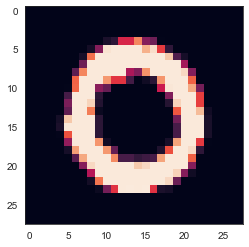

In [9]:
plt.figure()
plt.imshow(np.array(X_train.iloc[1,:]).reshape(28,28))
y_train[1]

## Converting Images with dimension 28 * 28 

In [10]:
X_train = np.array(X_train).reshape(-1,28,28,1)
X_test = np.array(test).reshape(-1,28,28,1)

While changing the Dimension, we use reshape(-1 , 28, 28, 1)

-1 is for the number of different images.
28 * 28 is the Image Dimension
1 is for the channel. RGB Images have 3 channels whereas grayscale images have only 1 channel.

In [11]:
X_train.shape

(42000, 28, 28, 1)

In [12]:
X_test.shape

(28000, 28, 28, 1)

1

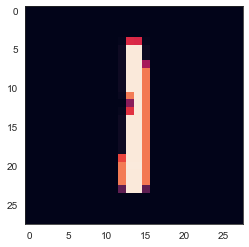

In [13]:
plt.imshow(X_train[2,:,:,-1])
y_train[2]

## Normalization

In [14]:
X_train = X_train.astype(float)/255.0
X_test = (X_test).astype(float)/255.0

It's very essential to Normalize the values before feeding it into the neural network as it speeds up the network and doesn't cause problem if the values of adjacent pixels fluctuate too much.

##  Encoding the Output classes

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train = to_categorical(y_train,num_classes=10)

## Splitting the Validation Data

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.18)


## Modeling

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [148]:
no_of_epochs = 30
bs = 32
input_shape = (28,28,1)
model = Sequential()

model.add(Conv2D(filters = 256, kernel_size = (3,3), input_shape = input_shape, activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),  activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(rate = 0.2))

model.add(Conv2D(filters = 64, kernel_size = (3,3),  activation = 'relu'))
model.add(Conv2D(filters = 256, kernel_size = (3,3),  activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))
model.add(Dropout(rate = 0.2))

model.add(Conv2D(filters = 128, kernel_size = (3,3),  activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))
model.add(Dropout(rate = 0.2))

model.add(Flatten())                                                          ## A flatten layer consisting image features

model.add(Dense(256, activation = 'relu'))                                    ## Fully connected Layer
model.add(Dropout(0.25))                                                       ## Avoid Overfitting       

model.add(Dense(10, activation = 'softmax'))                                   ## Output layer

We'll use input_shape same as the dimension of the Images in the Dataset.

In [149]:
from  tensorflow.keras.optimizers import Adam

adam = Adam(learning_rate= 0.0001)

In [150]:
model.compile(optimizer= adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [151]:
history = model.fit(x= X_train, y= y_train, validation_data=(X_val,y_val), epochs=no_of_epochs, use_multiprocessing= True,
         callbacks = [EarlyStopping(patience = 4)],
         batch_size= bs, verbose=1)

Epoch 1/30
1116/1116 [==============================] - 103s 92ms/step - loss: 0.5189 - accuracy: 0.8283 - val_loss: 0.1173 - val_accuracy: 0.9611
Epoch 2/30
1116/1116 [==============================] - 99s 89ms/step - loss: 0.1462 - accuracy: 0.9543 - val_loss: 0.0647 - val_accuracy: 0.9811
Epoch 3/30
1116/1116 [==============================] - 99s 89ms/step - loss: 0.0990 - accuracy: 0.9699 - val_loss: 0.0554 - val_accuracy: 0.9819
Epoch 4/30
1116/1116 [==============================] - 99s 89ms/step - loss: 0.0740 - accuracy: 0.9776 - val_loss: 0.0493 - val_accuracy: 0.9849
Epoch 5/30
1116/1116 [==============================] - 99s 89ms/step - loss: 0.0595 - accuracy: 0.9825 - val_loss: 0.0404 - val_accuracy: 0.9875
Epoch 6/30
1116/1116 [==============================] - 99s 89ms/step - loss: 0.0503 - accuracy: 0.9841 - val_loss: 0.0339 - val_accuracy: 0.9895
Epoch 7/30
1116/1116 [==============================] - 99s 88ms/step - loss: 0.0402 - accuracy: 0.9878 - val_loss: 0.0317 

## Vizualizations

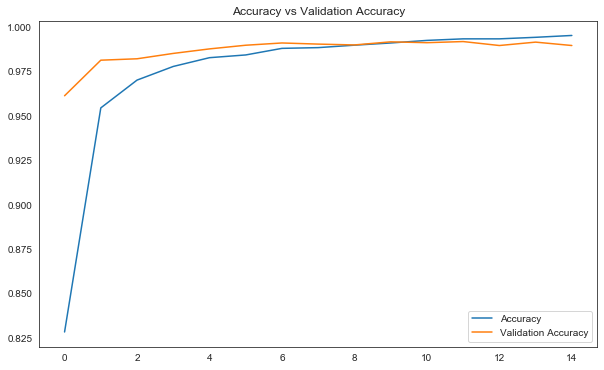

In [152]:
plt.figure(figsize = (10,6))
plt.plot(history.history['accuracy'] , label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy vs Validation Accuracy')
plt.legend()

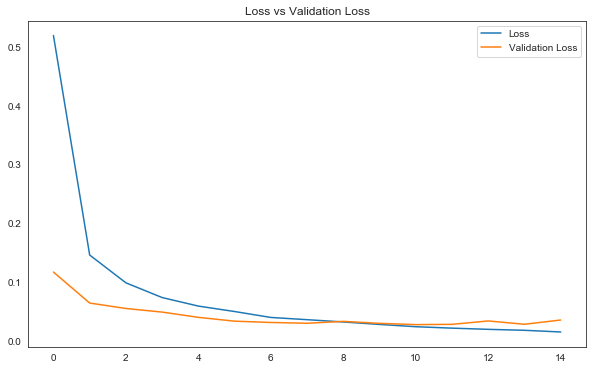

In [153]:
plt.figure(figsize = (10,6))
plt.plot(history.history['loss'] , label = 'Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss vs Validation Loss')
plt.legend()

## Prediction

In [154]:
y_pred = model.predict(X_test)

In [155]:
submission = pd.DataFrame(columns = ['ImageId', 'Label'], data = { 'ImageId' : list(range(1,28001)) ,  'Label' : np.argmax(y_pred,axis=1)})

In [146]:
submission.to_csv('Submission.csv', index=False)